Source: https://github.com/emhayki/CFD-Fundamental/blob/main/CFD-Fundamental-Guide.pdf

In [4]:
from IPython.display import Image

$$
\begin{equation}
\begin{aligned}
    \rho \left( \frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} + w \frac{\partial u}{\partial z} \right) &= -\frac{\partial p}{\partial x} + \mu \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} + \frac{\partial^2 u}{\partial z^2} \right) + f_x, \tag{1}\\
    \rho \left( \frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} + w \frac{\partial v}{\partial z} \right) &= -\frac{\partial p}{\partial y} + \mu \left( \frac{\partial^2 v}{\partial x^2} + \frac{\partial^2 v}{\partial y^2} + \frac{\partial^2 v}{\partial z^2} \right) + f_y, \tag{2}\\
    \rho \left( \frac{\partial w}{\partial t} + u \frac{\partial w}{\partial x} + v \frac{\partial w}{\partial y} + w \frac{\partial w}{\partial z} \right) &= -\frac{\partial p}{\partial z} + \mu \left( \frac{\partial^2 w}{\partial x^2} + \frac{\partial^2 w}{\partial y^2} + \frac{\partial^2 w}{\partial z^2} \right) + f_z, \tag{3}
\end{aligned}
\end{equation}
$$

Eq. (1) is the equation for the $x$ direction, Eq. (2) for the $y$ direction, and Eq (3) for the $z$ direction

Where: $\rho$ is the fluid density

 ,$\mu$ is the dynamic viscosity

 ,$p$ is the pressure

 ,$u, v, w$ are the velocity components in the $x, y, z$ directions, respectively

 ,$f_x, f_y, f_z$ are the body force components in the $x, y, z$ directions, respectively

Derivation of the 1-D non-linear convection equation, and it's linearization assumming a 'constant velocity' $c$ of wave like propagation. 

Assumming invicid flow, no presure gradient and no body force in the x direction Eq(1) becomes:

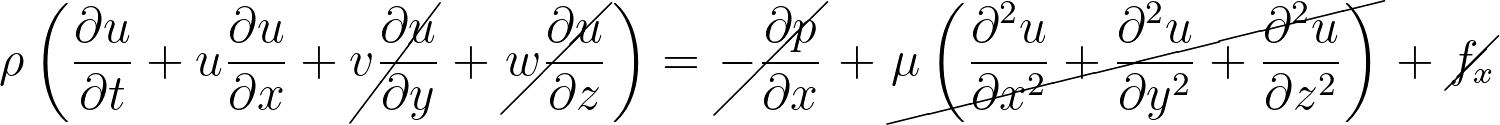

In [5]:
Image("images/simplified_ns.png")

$$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0 \tag{4}
$$

Eq. 4 is still a non-linear equation. To linearize it we consider $u$ to be constant, then $u = c$  

The result is the 1D transport equation:

$$ \frac {\partial u}{\partial t} + c \frac {\partial u}{\partial x}\tag{5} $$

where $u(x,t)$ is the quantity being transported, c is the transport velocity, $x$ is the spatial coordinate, and $t$ is time.

To plot the equation, using the finite difference method:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

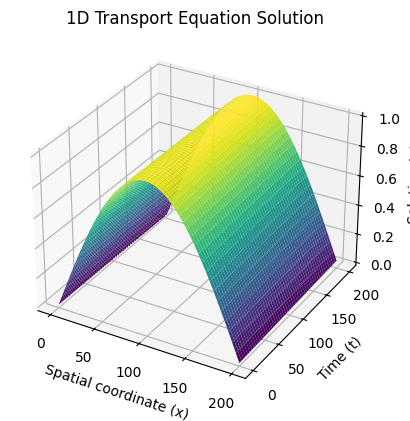

In [16]:
#defining parameters
nx = 1000 # number of spatial points
nt = 2000 # number of time steps
L = 200.0 # length of the spatial domain
T = 200 # total time
c = 0.01 # transport velocity

dx = L/(nx - 1) # spatial step size
dt = T/nt     # time step size

# stability criterion for the explicit scheme
if c*dt/ dx > 1:
    raise ValueError("The scheme is unstable. Please adjust dx, dt, or c.")

# initialize the spatial and temporal domain
x = np.linspace(0, L, nx)
t = np.linspace(0, T, nt)

# initial condition
u_initial = np.sin(np.pi*x/L)

# Initialize the solution matrix
u = np.zeros((nt, nx))
u[0, :] = u_initial

# Time-stepping loop
for n in range(0, nt-1):
    for i in range(1, nx):
        u[n+1, i] = u[n, i] - c * dt / dx * (u[n, i] - u[n, i-1])

# Plotting the solution in 3D
X, T = np.meshgrid(x, t)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, u, cmap='viridis')

ax.set_xlabel('Spatial coordinate (x)')
ax.set_ylabel('Time (t)')
ax.set_zlabel('Solution (u)')
ax.set_title('1D Transport Equation Solution')

plt.show()